In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/processed/train_CA_simp.csv')

In [4]:
df.is_fraud.value_counts(normalize=True)

is_fraud
0.0    0.878483
1.0    0.121517
Name: proportion, dtype: float64

In [5]:
df.columns

Index(['amt', 'city_pop', 'lat', 'long', 'is_fraud', 'state'], dtype='object')

**Distributions**

CA


/home/mrpink/Documentos/estudos/case_clear_sale/cs_fd_env/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/mrpink/Documentos/estudos/case_clear_sale/cs_fd_env/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 43.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


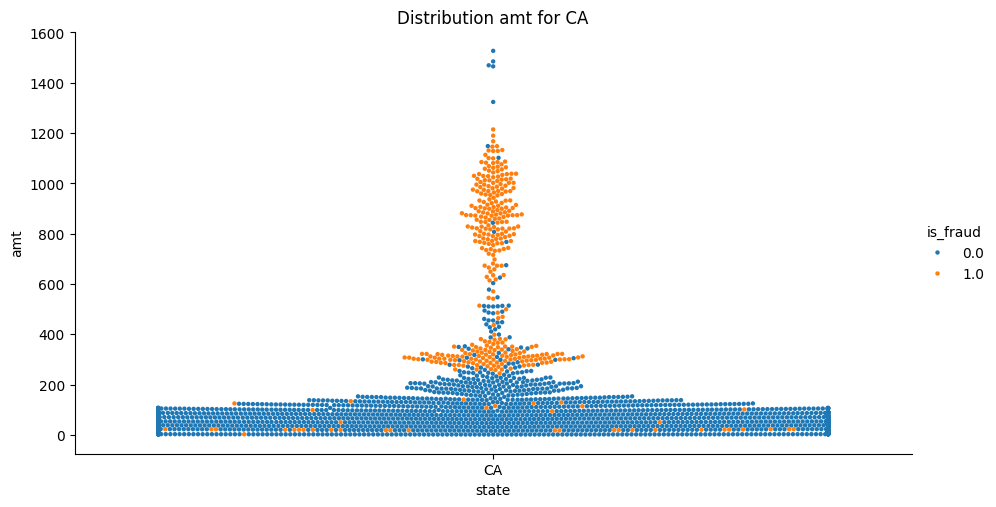

AK


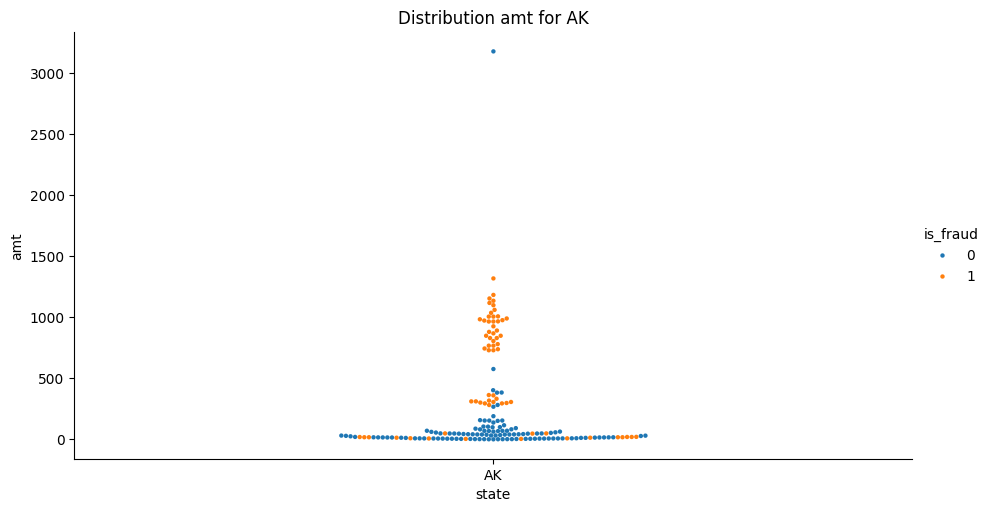

In [21]:
# Distribution of category columns with seaborn
def plot_cat_distribution(df, **kwargs):
    var_plots = kwargs.get('var_plots')['state']
    for state in var_plots:
        print(state)
        df = pd.read_csv(f'../data/processed/train_{state}_simp.csv')
        df_plot = df[['amt', 'is_fraud', 'state']]
        df_plot = df_plot[df_plot['state'].isin([state])]
        sns.catplot(df_plot, x='state', y='amt', s=10, kind='swarm', hue='is_fraud', aspect=11.7/6.27)
        plt.title(f'Distribution amt for {state}')
        plt.show()
        
plot_cat_distribution(df, var_plots={'state': ['CA', 'AK']})